In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('zoo.csv',header=0)

## **1.- DATASET**

In [19]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## **2.- Estadísticas**

In [21]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## **3.- VALORES NAN**

<Axes: >

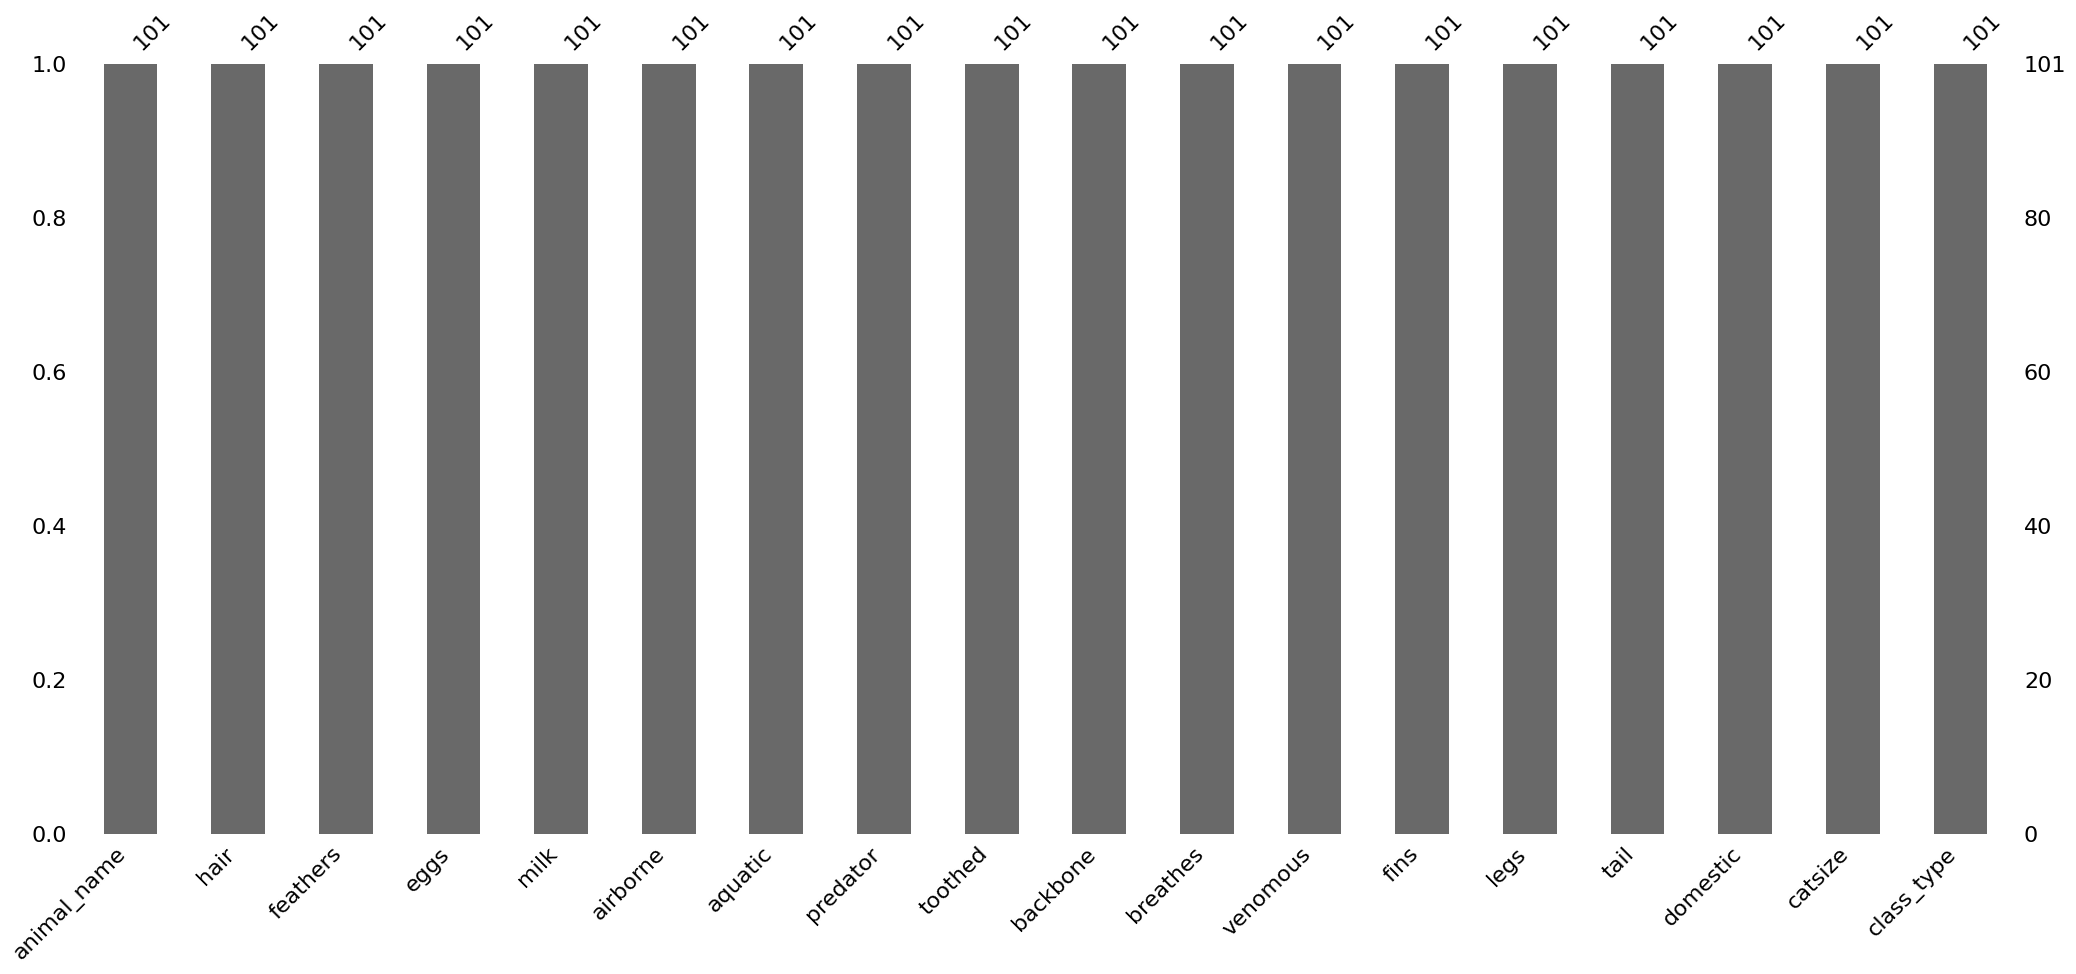

In [22]:
import missingno as msno

msno.bar(df)

## **4.- VARIANZA**

In [23]:
# Vamos a quitar aquellas variables cuya varianza sea menor a 0.1

df_numeric = df.select_dtypes(include=['number'])

var = df_numeric.var()

for col in range(len(var)):
  if var[col] < 0.1:
    df_var = df_var.drop([var.index[col]], axis=1)
df_var.info()

C:\Users\Adri\AppData\Local\Temp\ipykernel_9228\1331422735.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if var[col] < 0.1:


KeyError: "['venomous'] not found in axis"

## **5.- ¿Qué variables están más relacionadas con la variable objetivo?**

In [ ]:
correlaciones = abs(df.corr()['class_type']).sort_values(ascending=False)
print (correlaciones)

class_type    1.000000
backbone      0.828845
milk          0.723683
eggs          0.661825
tail          0.631830
hair          0.562384
catsize       0.521030
breathes      0.519308
toothed       0.471527
aquatic       0.326639
venomous      0.321476
feathers      0.197520
domestic      0.181043
legs          0.131693
fins          0.099430
predator      0.061179
airborne      0.022677
Name: class_type, dtype: float64


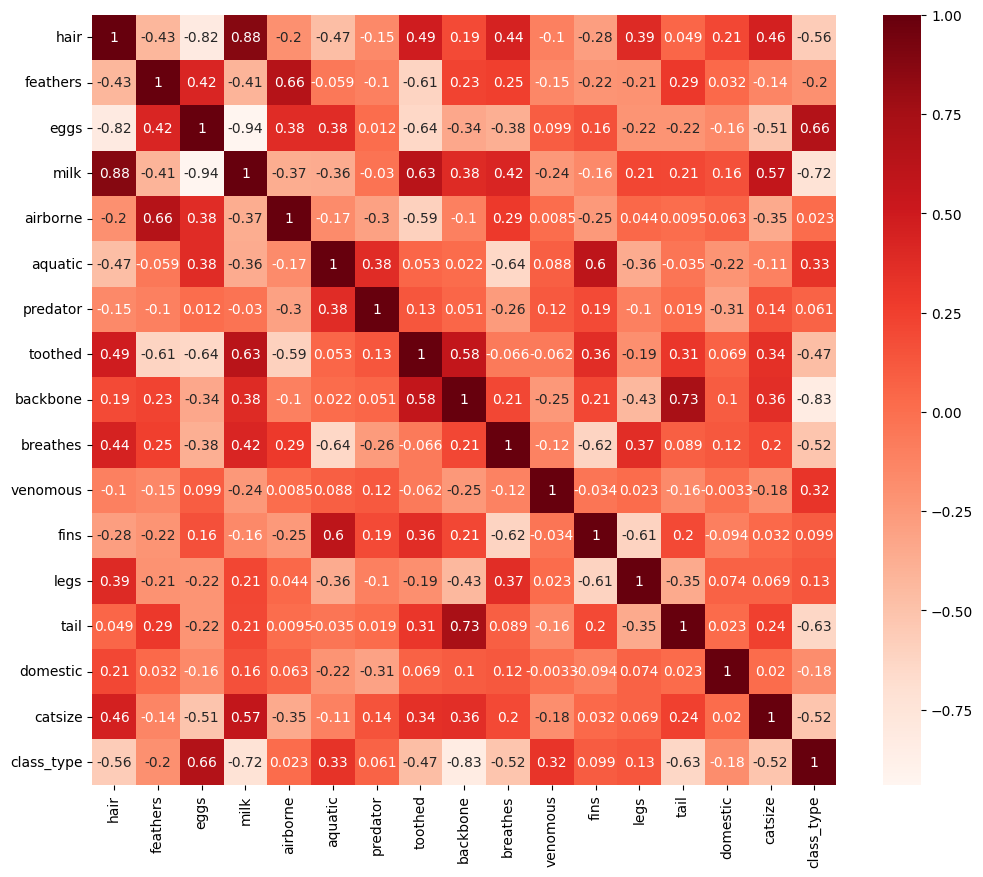

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = df.corr() #Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlación con la variable target
cor_target = abs(cor["class_type"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
relevant_features

hair          0.562384
eggs          0.661825
milk          0.723683
backbone      0.828845
breathes      0.519308
tail          0.631830
catsize       0.521030
class_type    1.000000
Name: class_type, dtype: float64

## **7.- ¿Se observa alguna diferencia entre Pearson y Spearman?**

In [ ]:
correlaciones = abs(df.corr('spearman')['class_type']).sort_values(ascending=False)
print (correlaciones)

class_type    1.000000
milk          0.886024
eggs          0.819282
hair          0.732588
backbone      0.690483
catsize       0.578225
breathes      0.538258
toothed       0.535235
tail          0.495965
aquatic       0.381848
venomous      0.317639
domestic      0.190137
fins          0.156947
airborne      0.138795
predator      0.061564
legs          0.053203
feathers      0.008877
Name: class_type, dtype: float64


In [ ]:
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = correlaciones[correlaciones>0.5]
relevant_features

class_type    1.000000
milk          0.886024
eggs          0.819282
hair          0.732588
backbone      0.690483
catsize       0.578225
breathes      0.538258
toothed       0.535235
Name: class_type, dtype: float64

Text(0.5, 0, 'class_type')

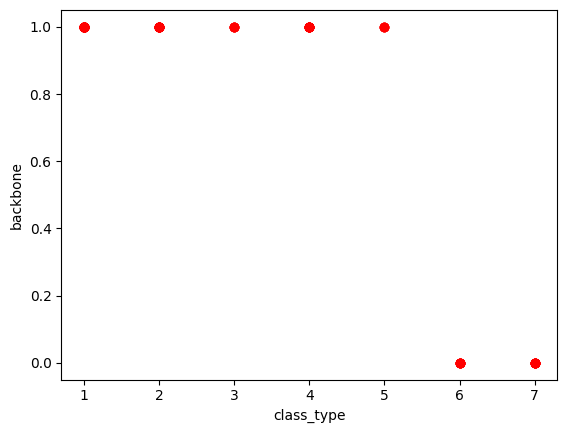

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['class_type'], df['backbone'], 'ro')
plt.ylabel("backbone")
plt.xlabel("class_type")

Text(0.5, 0, 'class_type')

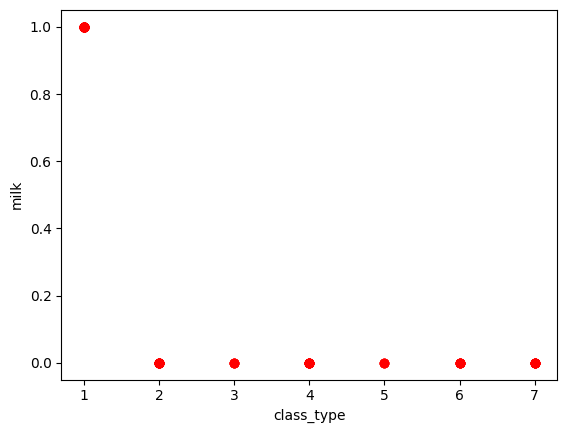

In [ ]:
plt.plot(df['class_type'], df['milk'], 'ro')
plt.ylabel("milk")
plt.xlabel("class_type")

## **8.- Aplicando backward elimination, ¿con qué variables nos quedamos?**

In [ ]:
#Backward
import statsmodels.api as sm

df = df.drop("animal_name",1)
X = df.drop("class_type",1)
y = df["class_type"]

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['feathers', 'milk', 'airborne', 'aquatic', 'toothed', 'backbone', 'fins']


## **9.- ¿Qué variables son las óptimas usando el método de RFE?**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#no of features
nof_list=np.arange(1,13)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.963515


In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

In [ ]:
selected_features_rfe

Index(['feathers', 'milk', 'backbone'], dtype='object')

## **10.-¿Cuantas variables elimina RIDGE y cúales son?¿Y LASSO?**

Lasso ha escogido 14 variables y la eliminado otras 2 variables


Text(0.5, 1.0, 'Importancia de las variables usando el Modelo de Lasso')

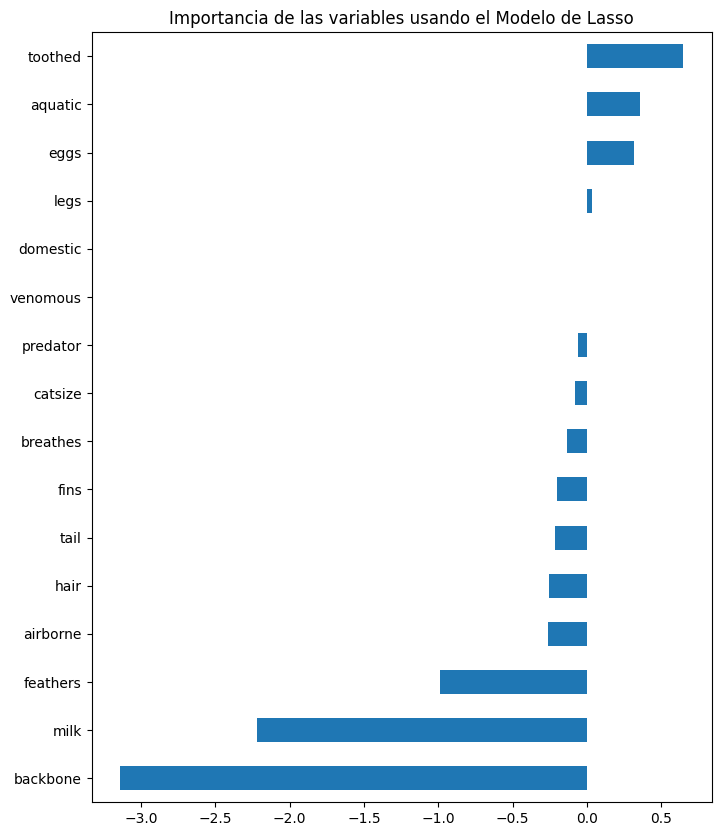

In [30]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt

reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso ha escogido " + str(sum(coef != 0)) + " variables y la eliminado otras " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Lasso")

Ridge ha escogido 16 variables y la eliminado otras 0 variables


Text(0.5, 1.0, 'Importancia de las variables usando el Modelo de Ridge')

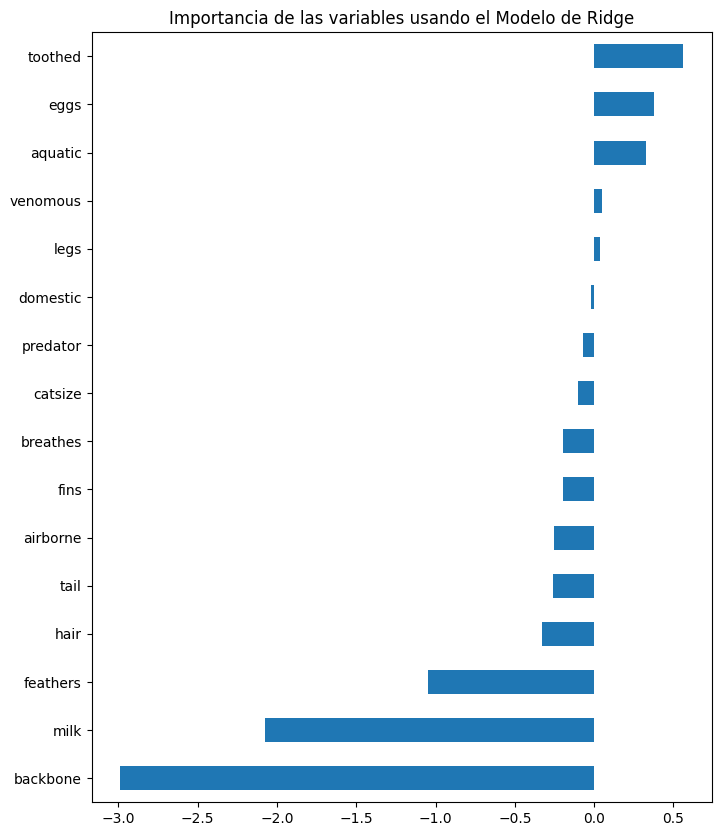

In [31]:
reg = RidgeCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Ridge ha escogido " + str(sum(coef != 0)) + " variables y la eliminado otras " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Ridge")

## **11.- ¿Usando 2 componentes, que peso tiene la variable "domestic" a la componente 1?**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)
#Procesado de los datos -> en este caso simplemente estandarizamos
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')

In [ ]:
index = df[:-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# incializamos el PCA ("pre-procesado) y una regresión logística (modelo)
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')
# aplicamos ambos algoritmos
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
#print(pca.components_.T)
loadings = pd.DataFrame(pca.components_.T)
loadings.columns = ['PC1', 'PC2']
loadings

,PC1,PC2
0,-0.368755,-0.190685
1,0.200053,-0.113467
2,0.424006,0.038304
3,-0.435960,-0.015692
4,0.219784,-0.275026
5,0.188414,0.395848
6,-0.017362,0.301195
7,-0.362232,0.237166
8,-0.249874,0.179621
9,-0.189105,-0.350482


## **12.- ¿Cuantos coeficientes se obtienen en LDA, razona la respuesta, y cuales son sus valores?**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [ ]:
lda.explained_variance_ratio_


array([0.48530122, 0.32230618, 0.08208776, 0.0732402 , 0.03236924,
       0.0046954 ])

In [ ]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])